# Random walk of motor planning in task-irrelevant dimensions - van Beers, Brenner, and Smeets (2013)

In [7]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import matplotlib.patches as patches

# Hypotheses

Random effects of planning noise in one movement is independent of that in other movements

$m_{pl}^{(t)} = m + r_{pl}^{(t)}$

Random effects of planning in one movement is dependent on that of the previous movement

$m_{pl}^{(t)} = m_{pl}^{(t-1)} + r_{pl}^{(t)}$

## Idea

Non-random walks along task-relevant dimension

Random walks along task-irrelevant dimension

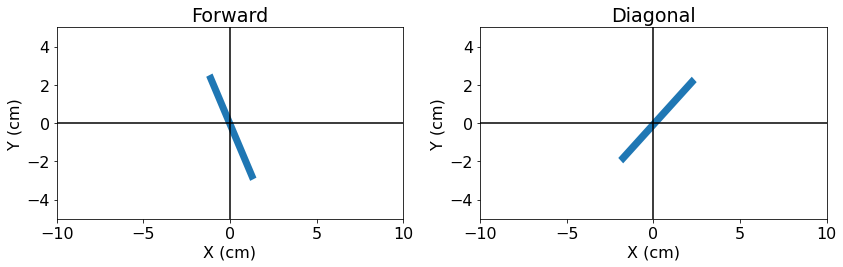

In [8]:
# Experimental set up 
num_reaches = 200

# Targets
length = 6 # cm 
thick = 0.4 # cm 
TC_forward = (length/2 * np.cos(np.deg2rad(270+25)) + 0 - thick/4, length/2 * (np.sin(np.deg2rad(270+25)) + 0 - thick/4))
TC_diagonal = (length/2 * np.cos(np.deg2rad(270-45)) + 0 + thick/4, length/2 * (np.sin(np.deg2rad(270-45)) + 0 + thick/4))

plt.figure(figsize=(12,4))

ax1 = plt.subplot(1,2,1) # forward
ax1.add_patch(patches.Rectangle(TC_forward, thick, length, 25))
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.xlim(-10, 10)
plt.ylim(-5,5)
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.title('Forward')

ax2 = plt.subplot(1,2,2) # diagonal 
ax2.add_patch(patches.Rectangle(TC_diagonal, thick, length, 360-45))
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.xlim(-10, 10)
plt.ylim(-5,5)
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.title('Diagonal')

plt.tight_layout()
plt.show()

In [73]:
# models 
def task_relevant(num_reaches, mean_end_point=0, r_mu=0, r_sig=0.3):
    m_pl = np.empty(num_reaches)
    for reach in range(num_reaches):
        m_pl[reach] = mean_end_point + np.random.normal(r_mu, r_sig, (1))
    return m_pl

def task_irrelevant(num_reaches, start_end_point=0, r_mu=0, r_sig=0.3):
    m_pl = np.empty(num_reaches)
    EP = start_end_point
    for reach in range(num_reaches):
        m_pl[reach] = EP + np.random.normal(r_mu, r_sig, (1))
        EP = m_pl[reach]
    return m_pl

def task_geneal(num_reaches, mean_EP=0, start_EP=0, r_mu=0, r_sigR=0.3, r_sigIR=0.3, learnR=0.9, learnIR=0): 
    # set up
    B = np.array([[learnR, 0], [0, learnIR]])
    m_pl = np.empty((num_reaches, 2))
    EP = np.empty((num_reaches, 2))
    ep = np.array([mean_EP, start_EP])
    er = np.array([0, 0])
    for reach in range(num_reaches): 
        # noise 
        planning_noise = np.random.normal(r_mu, [r_sigIR, r_sigR], (2,))
        execution_noise = np.random.normal(r_mu, [r_sigIR, r_sigR], (2,))
        # planning
        m_pl[reach,:] = ep - B @ er + planning_noise
        # execution 
        EP[reach,:] = m_pl[reach,:] + execution_noise
        # update 
        ep = np.array([mean_EP, m_pl[reach,1]])
        er = EP[reach,:]

    return EP

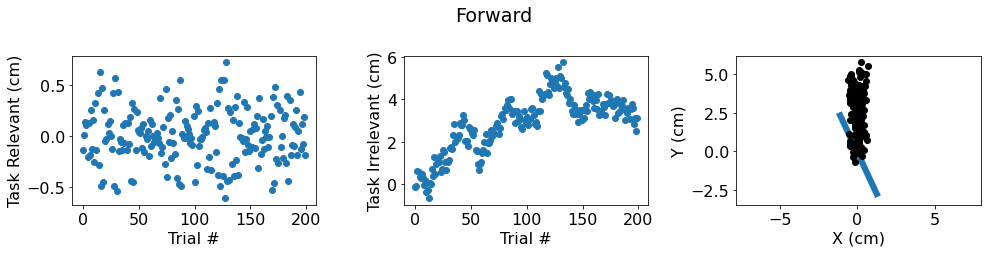

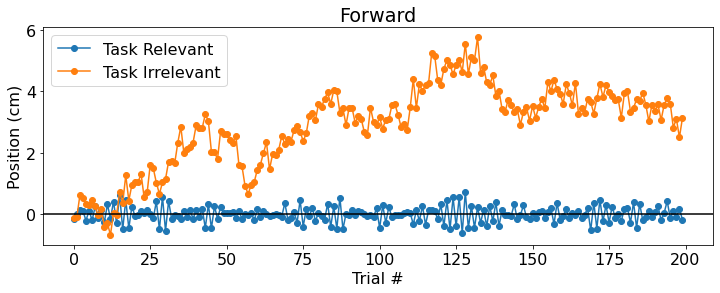

In [94]:
EP = task_geneal(num_reaches, r_sigR=0.25, r_sigIR=0.1)
m_plR = EP[:,0]
m_plIR = EP[:,1]

# visualize 
fig = plt.figure(figsize=(14,6))

plt.subplot(2,3,1) # task relevant 
plt.scatter(np.arange(0, num_reaches), m_plR)
plt.xlabel('Trial #')
plt.ylabel('Task Relevant (cm)')

plt.subplot(2,3,2) # task irrelevant
plt.scatter(np.arange(0, num_reaches), m_plIR)
plt.xlabel('Trial #')
plt.ylabel('Task Irrelevant (cm)')

ax3 = plt.subplot(2,3,3) # expeirmental data  
ax3.add_patch(patches.Rectangle(TC_forward, thick, length, 25))
plt.scatter(m_plR, m_plIR, color='k',zorder=2)
ax3.axis('equal')
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
fig.suptitle('Forward')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(np.arange(0, num_reaches), m_plR, 'o-', label='Task Relevant')
plt.plot(np.arange(0, num_reaches), m_plIR, 'o-', label='Task Irrelevant')
plt.axhline(0,color='k')
plt.ylabel('Position (cm)')
plt.xlabel('Trial #')
plt.title('Forward')
plt.legend(loc=0)
plt.show()

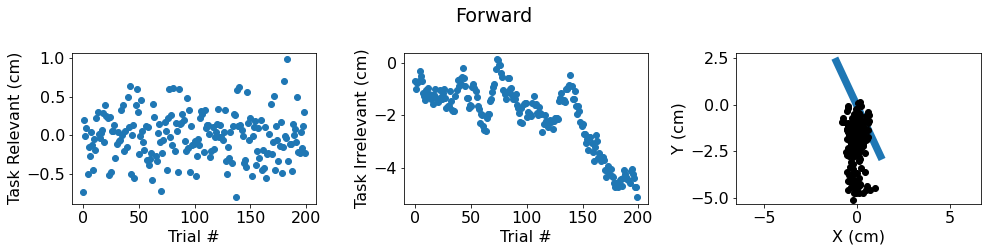

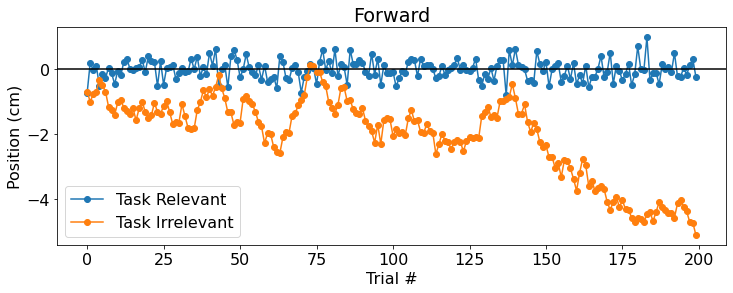

In [76]:
# forward test 
m_plR = task_relevant(num_reaches)
m_plIR = task_irrelevant(num_reaches)

# visualize 
fig = plt.figure(figsize=(14,6))

plt.subplot(2,3,1) # task relevant 
plt.scatter(np.arange(0, num_reaches), m_plR)
plt.xlabel('Trial #')
plt.ylabel('Task Relevant (cm)')

plt.subplot(2,3,2) # task irrelevant
plt.scatter(np.arange(0, num_reaches), m_plIR)
plt.xlabel('Trial #')
plt.ylabel('Task Irrelevant (cm)')

ax3 = plt.subplot(2,3,3) # expeirmental data  
ax3.add_patch(patches.Rectangle(TC_forward, thick, length, 25))
plt.scatter(m_plR, m_plIR, color='k',zorder=2)
ax3.axis('equal')
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
fig.suptitle('Forward')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(np.arange(0, num_reaches), m_plR, 'o-', label='Task Relevant')
plt.plot(np.arange(0, num_reaches), m_plIR, 'o-', label='Task Irrelevant')
plt.axhline(0,color='k')
plt.ylabel('Position (cm)')
plt.xlabel('Trial #')
plt.title('Forward')
plt.legend(loc=0)
plt.show()


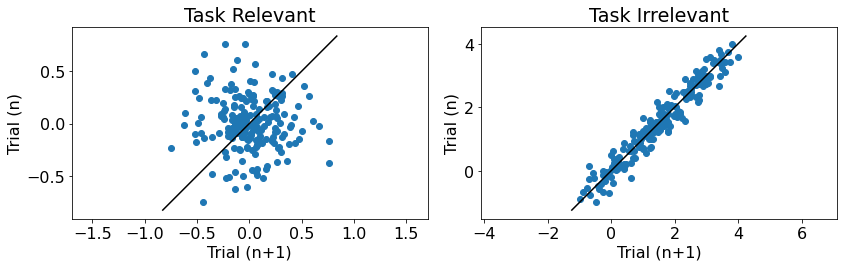

In [14]:
# correlations 

plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # task relevant 
plt.scatter(m_plR[1:], m_plR[:-1])
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.plot(xlim, ylim, color='k')
plt.xlabel('Trial (n+1)')
plt.ylabel('Trial (n)')
plt.title('Task Relevant')
plt.axis('equal')

plt.subplot(1,2,2) # task irrelevant 
plt.scatter(m_plIR[1:], m_plIR[:-1])
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.plot(xlim, ylim, color='k')
plt.xlabel('Trial (n+1)')
plt.ylabel('Trial (n)')
plt.title('Task Irrelevant')
plt.axis('equal')

plt.tight_layout()
plt.show()